# Project: Exploring Movie Popularity and Revenue 

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>

# Exploring Movie Popularity and Revenue 

We will be exploring the movie dataset from The Movie Database (TMDB), provided on Kaggle (https://www.kaggle.com/datasets/tmdb/tmdb-movie-metadata). The dataset is in a csv, with "," delimeters. It contains the columns: id, imdb_id, popularity, budget, revenue, original_title, cast, homepage, director, tagline, overview, runtime, genres, production_companies, release_date, vote_count, vote_average, release_year, budget_adj, revenue_adj. Some columns contain "|" delimeters.

We could explore so many different questions with this data set. The possibilities are nearly endless. However, we're going to focus mostly on the possible relationships between popularity, budget, revenue, and runtime. We will explore if there are relationships with directors as well. We will also look at how many movies per year and how many movies are in each genre, just for curiosity purposes.

The questions we're going to explore:
- Are movies with higher budgets more popular?
- Do more popular movies have higher revenue?
- Do movies with higher budgets have higher revenue?
- Are runtime and popularity correlated?
- Do movies with longer runtimes have higher revenue?
- Which movies have the highest revenue (top 10)? Who directed them?
- Which movies are the most popular (top 10)? Who directed them?
- How many movies are there per year?
- How many movies are in each genre?

Skip straight to the Exploratory Analysis:
<li><a href="#functions">Functions</a></li> 
 - This section defines functions we use to reduce and simplify redundant code.
<li><a href="#correlations">Correlations</a></li>
 - This section explores correlations with all of our variables.
<li><a href="#popularity">Popularity</a></li>
 - This section explores and answers popularity related questions.
<li><a href="#revenue">Revenue</a></li>
 - This section explores and answers revenue related questions.
<li><a href="#years">Years</a></li>
- This sections explores movies by year.
<li><a href="#genres">Genres</a></li>
- This section explores number of movies by genre.

In [313]:
#Importing packages/libraries and using our magic word for in-notebook visualizations.

import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
plt.style.use('bmh')
from matplotlib import figure


%matplotlib inline 

<a id='wrangling'></a>
## Data Wrangling

In this section, we load and preview our data to get an idea of the data structure.

<a href="#intro">Return to top</a>


Let's load in our data from 'tmdb-movies.csv' as df_movies using pd.read_csv(). We'll use the .head() function to retrieve the first few rows and take a look at it to get an idea of what kind of data we have to work with.

In [314]:
df_movies = pd.read_csv('tmdb-movies.csv')
df_movies.head()

,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,...,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,135397,tt0369610,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,http://www.jurassicworld.com/,Colin Trevorrow,The park is open.,...,Twenty-two years after the events of Jurassic ...,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,6/9/15,5562,6.5,2015,1.379999e+08,1.392446e+09
1,76341,tt1392190,28.419936,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,http://www.madmaxmovie.com/,George Miller,What a Lovely Day.,...,An apocalyptic story set in the furthest reach...,120,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,5/13/15,6185,7.1,2015,1.379999e+08,3.481613e+08
2,262500,tt2908446,13.112507,110000000,295238201,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,http://www.thedivergentseries.movie/#insurgent,Robert Schwentke,One Choice Can Destroy You,...,Beatrice Prior must confront her inner demons ...,119,Adventure|Science Fiction|Thriller,Summit Entertainment|Mandeville Films|Red Wago...,3/18/15,2480,6.3,2015,1.012000e+08,2.716190e+08
3,140607,tt2488496,11.173104,200000000,2068178225,Star Wars: The Force Awakens,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,http://www.starwars.com/films/star-wars-episod...,J.J. Abrams,Every generation has a story.,...,Thirty years after defeating the Galactic Empi...,136,Action|Adventure|Science Fiction|Fantasy,Lucasfilm|Truenorth Productions|Bad Robot,12/15/15,5292,7.5,2015,1.839999e+08,1.902723e+09
4,168259,tt2820852,9.335014,190000000,1506249360,Furious 7,Vin Diesel|Paul Walker|Jason Statham|Michelle ...,http://www.furious7.com/,James Wan,Vengeance Hits Home,...,Deckard Shaw seeks revenge against Dominic Tor...,137,Action|Crime|Thriller,Universal Pictures|Original Film|Media Rights ...,4/1/15,2947,7.3,2015,1.747999e+08,1.385749e+09


The .info() function gives us a quick overview of column names and data types, as well as non-null values.

In [315]:
df_movies.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10866 entries, 0 to 10865
Data columns (total 21 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   id                    10866 non-null  int64  
 1   imdb_id               10856 non-null  object 
 2   popularity            10866 non-null  float64
 3   budget                10866 non-null  int64  
 4   revenue               10866 non-null  int64  
 5   original_title        10866 non-null  object 
 6   cast                  10790 non-null  object 
 7   homepage              2936 non-null   object 
 8   director              10822 non-null  object 
 9   tagline               8042 non-null   object 
 10  keywords              9373 non-null   object 
 11  overview              10862 non-null  object 
 12  runtime               10866 non-null  int64  
 13  genres                10843 non-null  object 
 14  production_companies  9836 non-null   object 
 15  release_date       

# Data Cleaning

Tasks:

- Drop unnecessary columns.
- Check data types - do any need to be changed? <li><a href="#datatypes">Skip to Datatypes</a></li>
- Decide what to do with zero values. <li><a href="#zeroes">Skip to Zero Values</a></li>
- Fill or drop NULL values. <li><a href="#nulls">Skip to NULL and Missing Values</a></li>
- Check for duplicates, drop if present. <li><a href="#duplicates">Skip to Duplicates</a></li>

<a href="#intro">Return to top</a>


Let's take another look at the questions we want to explore to decide which columns we can safely remove.

The questions we're going to explore:
- Are movies with higher budgets more popular?
- Do more popular movies have higher revenue?
- Do movies with higher budgets have higher revenue?
- Are runtime and popularity correlated?
- Do movies with longer runtimes have higher revenue?
- Which movies have the highest revenue (top 10)? Who directed them?
- Which movies are the most popular (top 10)? Who directed them?
- How many movies are there per year?
- How many movies are in each genre?


In [316]:
#Let's remove the extra columns we know we won't be using for our exploratory analysis.
df_movies.drop(['imdb_id','cast','homepage','tagline','keywords','overview','production_companies',], axis=1, inplace=True)

In [317]:
df_movies.head()

,id,popularity,budget,revenue,original_title,director,runtime,genres,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,135397,32.985763,150000000,1513528810,Jurassic World,Colin Trevorrow,124,Action|Adventure|Science Fiction|Thriller,6/9/15,5562,6.5,2015,1.379999e+08,1.392446e+09
1,76341,28.419936,150000000,378436354,Mad Max: Fury Road,George Miller,120,Action|Adventure|Science Fiction|Thriller,5/13/15,6185,7.1,2015,1.379999e+08,3.481613e+08
2,262500,13.112507,110000000,295238201,Insurgent,Robert Schwentke,119,Adventure|Science Fiction|Thriller,3/18/15,2480,6.3,2015,1.012000e+08,2.716190e+08
3,140607,11.173104,200000000,2068178225,Star Wars: The Force Awakens,J.J. Abrams,136,Action|Adventure|Science Fiction|Fantasy,12/15/15,5292,7.5,2015,1.839999e+08,1.902723e+09
4,168259,9.335014,190000000,1506249360,Furious 7,James Wan,137,Action|Crime|Thriller,4/1/15,2947,7.3,2015,1.747999e+08,1.385749e+09


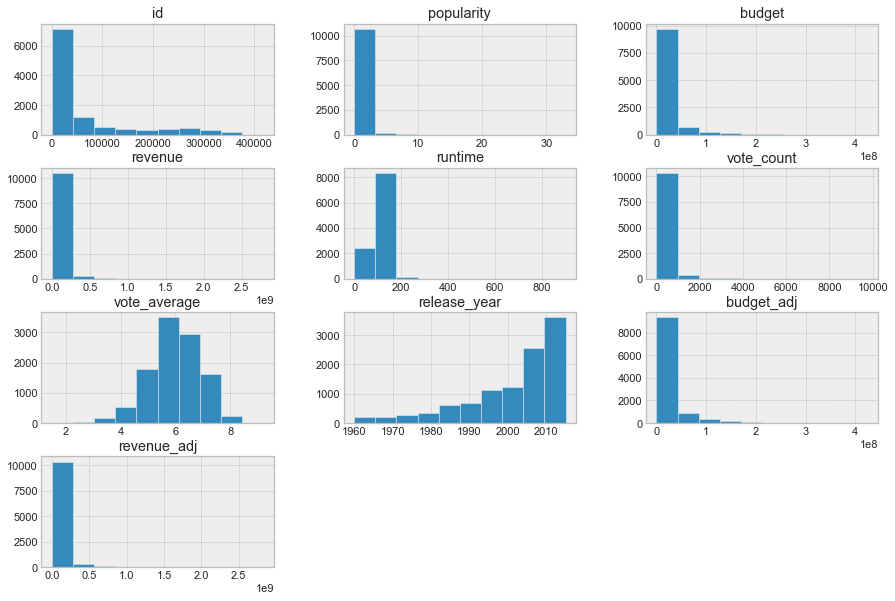

In [318]:
#Look at histograms before data cleaning

df_movies.hist(figsize=(15,10));

<a id='datatypes'></a>

### Data Type Conversion
This is what our dataset now looks like. Let's doublecheck the datatypes to see if we need to make any conversions.

In [319]:
df_movies.dtypes

id                  int64
popularity        float64
budget              int64
revenue             int64
original_title     object
director           object
runtime             int64
genres             object
release_date       object
vote_count          int64
vote_average      float64
release_year        int64
budget_adj        float64
revenue_adj       float64
dtype: object

In [320]:
#Convert release_date to datetime data type. We can leave release_year as an int data type.

df_movies['release_date'] = pd.to_datetime(df_movies['release_date'])


In [321]:
#Double check data types of df_movies

df_movies.dtypes

id                         int64
popularity               float64
budget                     int64
revenue                    int64
original_title            object
director                  object
runtime                    int64
genres                    object
release_date      datetime64[ns]
vote_count                 int64
vote_average             float64
release_year               int64
budget_adj               float64
revenue_adj              float64
dtype: object

We did it, release_date has been converted to a datetime data type!

While the rest of the data types work for our exploratory purposes, we're going to convert budget_adj and revenue_adj from float to int data types. They should have the same data types as budget and revenue. Let's do that below!

In [322]:
#Convert budget_adj and revenue_adj from float to int data types
df_movies['budget_adj'] = df_movies['budget_adj'].astype('int64')
df_movies['revenue_adj'] = df_movies['revenue_adj'].astype('int64')

#Check to make sure data types converted
df_movies.dtypes

id                         int64
popularity               float64
budget                     int64
revenue                    int64
original_title            object
director                  object
runtime                    int64
genres                    object
release_date      datetime64[ns]
vote_count                 int64
vote_average             float64
release_year               int64
budget_adj                 int64
revenue_adj                int64
dtype: object

We did it! All our data types are ready for further exploration. Now let's take a look at "0" values and null or missing values.

### Zero, null, and missing values

<a id='zeroes'></a>

#### Zero values

Here we discover some trends based on the data as it is now. I noticed that some fields have "0"s, which I didn't account for in the previous version of this project. 

Since the purpose of this is to explore the available data, not to make any business decisions, we have a few options to handle this situation:
- Drop all "0" values
- Keep the "0" values, but account for them in calculations with ">0" parameters.
- Fill "0" values with the mean or median of the data. 

If we were to drop all the rows where "0s" were present, we would be losing thousands of records and valuable data for our exploration. We won't be choosing this option.

Keeping the "0" values but accounting for them in calculations could work, but it still filters out valuable data that we're trying to explore.

For our purposes, let's choose to fill them with the mean.

In [323]:
# Get the count of Zeros in each column 

for col in df_movies:
    column = df_movies[col]
    count = (column == 0).sum()
    print('Count of "0" in', col, ' is : ', count) 

Count of "0" in id  is :  0
Count of "0" in popularity  is :  0
Count of "0" in budget  is :  5696
Count of "0" in revenue  is :  6016
Count of "0" in original_title  is :  0
Count of "0" in director  is :  0
Count of "0" in runtime  is :  31
Count of "0" in genres  is :  0
Count of "0" in release_date  is :  0
Count of "0" in vote_count  is :  0
Count of "0" in vote_average  is :  0
Count of "0" in release_year  is :  0
Count of "0" in budget_adj  is :  5698
Count of "0" in revenue_adj  is :  6016


In [324]:
df_movies['budget'] = df_movies['budget'].replace(0, df_movies['budget'].mean())

df_movies['budget'].describe()

count    1.086600e+04
mean     2.229255e+07
std      2.801245e+07
min      1.000000e+00
25%      1.462570e+07
50%      1.462570e+07
75%      1.500000e+07
max      4.250000e+08
Name: budget, dtype: float64

In [325]:
df_movies['revenue'] = df_movies['revenue'].replace(0, df_movies['revenue'].mean())

df_movies['revenue'].describe()

count    1.086600e+04
mean     6.187164e+07
std      1.110204e+08
min      2.000000e+00
25%      3.982332e+07
50%      3.982332e+07
75%      3.982332e+07
max      2.781506e+09
Name: revenue, dtype: float64

In [326]:
df_movies['budget_adj'] = df_movies['budget_adj'].replace(0, df_movies['budget_adj'].mean())

df_movies['budget_adj'].describe()

count    1.086600e+04
mean     2.675459e+07
std      3.050659e+07
min      1.000000e+00
25%      1.755104e+07
50%      1.755104e+07
75%      2.085325e+07
max      4.250000e+08
Name: budget_adj, dtype: float64

In [327]:
df_movies['revenue_adj'] = df_movies['revenue_adj'].replace(0, df_movies['revenue_adj'].mean())

df_movies['revenue_adj'].describe()

count    1.086600e+04
mean     7.980243e+07
std      1.365610e+08
min      2.000000e+00
25%      5.136436e+07
50%      5.136436e+07
75%      5.136436e+07
max      2.827124e+09
Name: revenue_adj, dtype: float64

We have successfully filled the "0" values in budget, revenue, budget_adj, and revenue_adj with their mean values. We will fill runtime "0" values with "NaN" after we drop other nulls. Let's take a look at nulls now.

<a id='nulls'></a>

#### Null or missing values

In [328]:
#Check for nulls, find how many and where they're located
df_movies.isnull().sum()

id                 0
popularity         0
budget             0
revenue            0
original_title     0
director          44
runtime            0
genres            23
release_date       0
vote_count         0
vote_average       0
release_year       0
budget_adj         0
revenue_adj        0
dtype: int64

In [329]:
df_movies.dropna(inplace=True)

Let's check our null values again to make sure they've been dropped.

In [330]:
df_movies.isnull().sum()

id                0
popularity        0
budget            0
revenue           0
original_title    0
director          0
runtime           0
genres            0
release_date      0
vote_count        0
vote_average      0
release_year      0
budget_adj        0
revenue_adj       0
dtype: int64

Success! We've dropped null values. Runtime also had values of "0", however we are going to fill these in with NaN. We are not going to drop these, so they weren't included above. We'll use the same .replace() function to accomplish this.

In [331]:
df_movies['runtime'] = df_movies['runtime'].replace(0, np.NaN)

df_movies['runtime'].describe()

count    10773.000000
mean       102.454377
std         30.377912
min          2.000000
25%         90.000000
50%         99.000000
75%        112.000000
max        900.000000
Name: runtime, dtype: float64

Now we're going to save our data in a new file called 'tmdb_movies_v2.csv' with the variable df_movies_v1. After that, we'll check for duplicates.

In [332]:
df_movies.to_csv('tmdb_movies_v2.csv', index=False)

<a id='duplicates'></a>

#### Duplicates

In [333]:
df_movies_v2 = pd.read_csv('tmdb_movies_v2.csv')

In [334]:
df_movies_v2.head()

,id,popularity,budget,revenue,original_title,director,runtime,genres,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,135397,32.985763,150000000.0,1.513529e+09,Jurassic World,Colin Trevorrow,124.0,Action|Adventure|Science Fiction|Thriller,2015-06-09,5562,6.5,2015,137999939.0,1.392446e+09
1,76341,28.419936,150000000.0,3.784364e+08,Mad Max: Fury Road,George Miller,120.0,Action|Adventure|Science Fiction|Thriller,2015-05-13,6185,7.1,2015,137999939.0,3.481613e+08
2,262500,13.112507,110000000.0,2.952382e+08,Insurgent,Robert Schwentke,119.0,Adventure|Science Fiction|Thriller,2015-03-18,2480,6.3,2015,101199955.0,2.716190e+08
3,140607,11.173104,200000000.0,2.068178e+09,Star Wars: The Force Awakens,J.J. Abrams,136.0,Action|Adventure|Science Fiction|Fantasy,2015-12-15,5292,7.5,2015,183999919.0,1.902723e+09
4,168259,9.335014,190000000.0,1.506249e+09,Furious 7,James Wan,137.0,Action|Crime|Thriller,2015-04-01,2947,7.3,2015,174799923.0,1.385749e+09


In [335]:
df_movies_v2.duplicated().sum()

1

Looks like we have 1 duplicate. Let's drop it below.

In [336]:
#drop duplicate

df_movies_v2.drop_duplicates(inplace=True)

Let's save our clean data.

In [337]:
#Saving our clean data to df_movies_clean

df_movies_v2.to_csv('tmdb_movies_clean.csv', index=False)

In [338]:
#Load our clean data file

df_movies_clean = pd.read_csv('tmdb_movies_clean.csv')


<a id='eda'></a>
## Exploratory Data Analysis

Our questions: 
- Are movies with higher budgets more popular?
- Do more popular movies have higher revenue?
- Do movies with higher budgets have higher revenue?
- Are runtime and popularity correlated?
- Do movies with longer runtimes have higher revenue?
- Which movies have the highest revenue (top 10)? Who directed them?
- Which movies are the most popular (top 10)? Who directed them?
- How many movies are there per year?
- How many movies are in each genre?

<li><a href="#functions">Functions</a></li> 
 - This section defines functions we use to reduce and simplify redundant code.
<li><a href="#correlations">Correlations</a></li>
 - This section explores correlations with all of our variables.
<li><a href="#popularity">Popularity</a></li>
 - This section explores and answers popularity related questions.
<li><a href="#revenue">Revenue</a></li>
 - This section explores and answers revenue related questions.
<li><a href="#years">Years</a></li>
- This sections explores movies by year.
<li><a href="#genres">Genres</a></li>
- This section explores number of movies by genre.

<a href="#intro">Return to top</a>


<a id='functions'></a>

#### Functions

These are various functions we will use to explore our data.

In [339]:
#These visualizations use the Seaborn package. These are called pairplots, which show the distribution of each variable and their relationships.

def popbudgrev_func(col):
    pop_budg_rev_list = df_movies_clean.columns[1:4]
    sns.pairplot(df_movies_clean[pop_budg_rev_list], hue=col, height=3.5);
   

In [340]:
#Creates a "Top 10" Barplot, grouped by Title.

def top_10_barplot(col):
    temp_df = pd.DataFrame(df_movies_clean.groupby('original_title').sum()[col].nlargest(10))
    temp_df = temp_df.reset_index()
    sns.barplot(x=col, y='original_title', data=temp_df);
    plt.title('Top 10 Movies by '+col);

In [341]:
#Creates a "Top 10" Barplot, grouped by Director.

def director_barplot(col):
    temp_df = pd.DataFrame(df_movies_clean.groupby('director').sum()[col].nlargest(10))
    temp_df = temp_df.reset_index()
    sns.barplot(x=col, y='director', data=temp_df);
    plt.title('Top 10 Directors by '+col)

In [342]:
#This function is used to split columns with "|" as a delimeter and count the values. 
#Reference: https://github.com/hima888/Investigate-a-Dataset-TMDB-Movie-Data-/blob/master/investigate-a-dataset-template.ipynb
def split_count(x):
    data_plot = df_movies_clean[x].str.cat(sep = '|')
    data = pd.Series(data_plot.split('|'))
    info = data.value_counts(ascending=False)
    return info

<a id='correlations'></a>

### Explore Correlations

In [343]:
#This is a correlation matrix between all columns/variables. The closer to 1, the higher the correlation.
df_movies_clean.corr(method='pearson')

,id,popularity,budget,revenue,runtime,vote_count,vote_average,release_year,budget_adj,revenue_adj
id,1.000000,-0.011772,-0.099752,-0.066678,-0.075338,-0.033965,-0.064347,0.511214,-0.150778,-0.107197
popularity,-0.011772,1.000000,0.515705,0.635266,0.138651,0.800710,0.213046,0.091352,0.482373,0.578065
budget,-0.099752,0.515705,1.000000,0.705397,0.173983,0.615485,0.075807,0.130335,0.962350,0.573418
revenue,-0.066678,0.635266,0.705397,1.000000,0.144379,0.772899,0.153757,0.065857,0.674343,0.909803
runtime,-0.075338,0.138651,0.173983,0.144379,1.000000,0.165169,0.162703,-0.112649,0.208347,0.157739
vote_count,-0.033965,0.800710,0.615485,0.772899,0.165169,1.000000,0.256772,0.109144,0.568928,0.685859
vote_average,-0.064347,0.213046,0.075807,0.153757,0.162703,0.256772,1.000000,-0.122493,0.089528,0.175104
release_year,0.511214,0.091352,0.130335,0.065857,-0.112649,0.109144,-0.122493,1.000000,0.021292,-0.064515
budget_adj,-0.150778,0.482373,0.962350,0.674343,0.208347,0.568928,0.089528,0.021292,1.000000,0.602011
revenue_adj,-0.107197,0.578065,0.573418,0.909803,0.157739,0.685859,0.175104,-0.064515,0.602011,1.000000


We can see in this correlation matrix that budget and budget_adj/revenue and revenue_adj are highly correlated values. What else is highly correlated? Let's take a look with a visual heatmap of the above correlation matrix.

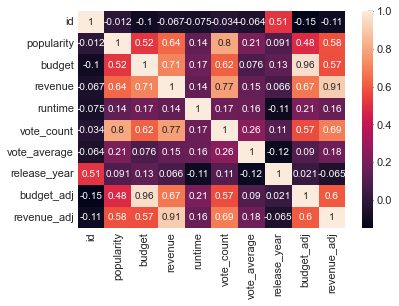

In [344]:
#Here we create a visualization of the correlation matrix. The lighter the color, the higher the correlation. As you can see, the columns/variables that are the lightest are correlated to themselves.
correlation_matrix = df_movies_clean.corr(method='pearson')

sns.heatmap(correlation_matrix, annot=True)

plt.show()

Budget and Revenue have a relatively higher correlation than others at 0.71, as do their inflation adjusted counterparts (budget_adj and revenue_adj) at 0.6. 

Popularity and vote_count have a high correlation of 0.8, which makes sense since vote_count is a metric to determine popularity. One surprising correlation is vote_count to both budget (0.62) and revenue (0.77), also budget_adj (0.57) and revenue_adj (0.69).

Popularity and both budget (0.52) and revenue (0.64) seem to have a medium correlation, with budget_adj (0.48) and revenue_adj (0.58). We'll explore these further.

<a id='popularity'></a>

### Which factors influence a movie's popularity?

Let's start out by taking a look at the Top 10 Movies by popularity.

In [345]:
#filter for top 10 most popular with title and director

df_movies_clean.nlargest(10,'popularity')

,id,popularity,budget,revenue,original_title,director,runtime,genres,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,135397,32.985763,150000000.0,1.513529e+09,Jurassic World,Colin Trevorrow,124.0,Action|Adventure|Science Fiction|Thriller,2015-06-09,5562,6.5,2015,137999939.0,1.392446e+09
1,76341,28.419936,150000000.0,3.784364e+08,Mad Max: Fury Road,George Miller,120.0,Action|Adventure|Science Fiction|Thriller,2015-05-13,6185,7.1,2015,137999939.0,3.481613e+08
624,157336,24.949134,165000000.0,6.217525e+08,Interstellar,Christopher Nolan,169.0,Adventure|Drama|Science Fiction,2014-11-05,6498,8.0,2014,151980023.0,5.726906e+08
625,118340,14.311205,170000000.0,7.733124e+08,Guardians of the Galaxy,James Gunn,121.0,Action|Science Fiction|Adventure,2014-07-30,5612,7.9,2014,156585478.0,7.122911e+08
2,262500,13.112507,110000000.0,2.952382e+08,Insurgent,Robert Schwentke,119.0,Adventure|Science Fiction|Thriller,2015-03-18,2480,6.3,2015,101199955.0,2.716190e+08
626,100402,12.971027,170000000.0,7.147666e+08,Captain America: The Winter Soldier,Joe Russo|Anthony Russo,136.0,Action|Adventure|Science Fiction,2014-03-20,3848,7.6,2014,156585478.0,6.583651e+08
1318,11,12.037933,11000000.0,7.753980e+08,Star Wars,George Lucas,121.0,Adventure|Action|Science Fiction,1977-03-20,4428,7.9,1977,39575591.0,2.789712e+09
627,245891,11.422751,20000000.0,7.873990e+07,John Wick,Chad Stahelski|David Leitch,101.0,Action|Thriller,2014-10-22,2712,7.0,2014,18421821.0,7.252661e+07
3,140607,11.173104,200000000.0,2.068178e+09,Star Wars: The Force Awakens,J.J. Abrams,136.0,Action|Adventure|Science Fiction|Fantasy,2015-12-15,5292,7.5,2015,183999919.0,1.902723e+09
628,131631,10.739009,125000000.0,7.521002e+08,The Hunger Games: Mockingjay - Part 1,Francis Lawrence,123.0,Science Fiction|Adventure|Thriller,2014-11-18,3590,6.6,2014,115136381.0,6.927528e+08


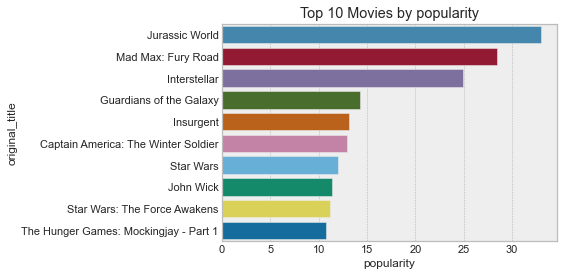

In [346]:
#We will call our top_10_barplot function to visualize the top 10 movies by popularity.
top_10_barplot('popularity')

There doesn't appear to be a correlation between director and popularity. The most popular movie is Jurassic World. 

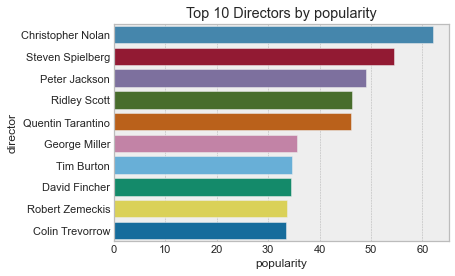

In [347]:
#Let's check the most popular directors with a barplot. We'll do this by calling the director_barplot function.

director_barplot('popularity')

Here we can see that the director associated with the most popularity is Christopher Nolan, followed by Steven Spielberg, and then Peter Jackson.

Let's now take a look at some other visualizations to see if budget, revenue, adjusted budget and revenue, and runtime have any correleation with popularity.

In [ ]:
#This calls our function to see how popularity, budget, and revenue relate to eachother with pairplots
popbudgrev_func('popularity')

It looks like there may be some correlation between popularity, revenue, and budget within certain ranges. Let's take a closer look.

In [ ]:
#We'll run a scatter plot with regression line to see the relationship between popularity and budget.
ax = sns.regplot(x='budget', y='popularity', data=df_movies_clean, scatter_kws={'color': 'm','alpha':0.3}, line_kws={'color': 'red'});

It looks like the biggest correlation is within budgets under $2M, with the most popular movies falling between 1.5M and 2M.

In [ ]:
ax = sns.regplot(x='revenue', y='popularity', data=df_movies_clean, scatter_kws={'color': 'm','alpha':0.3}, line_kws={'color': 'red'});

This looks like a similar correlation between popularity and budget, where movies earning .5M to 1.5M appear to have the most popular movies.

Now let's look at runtime.

In [ ]:
sns.scatterplot(data=df_movies_clean, x="runtime", y="popularity")
plt.title('Runtime vs Popularity');

The runtime scatterplot shows that movies between 1 and 3.5 hours tend to be more popular.

<a id='revenue'></a>


### Which factors influence a movie's revenue?

We can see that both revenue and revenue_adj are skewed to the right.

In [ ]:
#filter for top 10 highest revenue with title and director

df_movies_clean.nlargest(10,'revenue')

Directors may have an influence on revenue. Both James Cameron and Joss Whedon appear twice in the top 10. Here, Avatar is the movie with highest revenue. Let's check again with the adjusted revenue.

In [ ]:
#filter for top 10 highest revenue with title and director

df_movies_clean.nlargest(10,'revenue_adj')

Interesting! James Cameron still acounts for 2 of the top 10 highest earning movies, but now so does Steven Spielberg. Joss Whedon has 1 instead of 2. Avatar is still the movie with highest revenue. Directors may have an influence over revenue, but this analysis is inconclusive. *For my own curiosity, I did expand these queries to the top 25 and found similar results.*

In [ ]:
#Let's see which directors have earned the most revenue over their careers.
director_barplot('revenue')

Wow! This is also interesting. We find that Steven Spielberg has earned the most revenue for his movies than any other director. 

In [ ]:
#Let's call our pairplot function to see the relationships between revenue, budget, and popularity
popbudgrev_func('revenue')

We've added plots with regression lines for Revenue vs Popularity and Revenue vs Budget.

In [ ]:
ax = sns.regplot(x='popularity', y='revenue', data=df_movies_clean, scatter_kws={'color': 'm','alpha':0.3}, line_kws={'color': 'red'});

Similarly to what we observed in the popularity section, movies between .5M and 1.5M are among the most popular.

In [ ]:
ax = sns.regplot(x='budget', y='revenue', data=df_movies_clean, scatter_kws={'color': 'm','alpha':0.3}, line_kws={'color': 'red'});

There does appear to be some correlation between revenue and budget. It looks like movies with budgets between 1.5M and 3M tend to have higher revenue. Let's look at the adjusted budget and adjusted revenue variables.

In [ ]:
ax = sns.regplot(x='budget_adj', y='revenue_adj', data=df_movies_clean, scatter_kws={'color': 'm','alpha':0.3}, line_kws={'color': 'red'});

This scatterplot reveals slightly different findings. It appears that there are several higher earning movies in the <1M budget. Further analysis is needed.


In [ ]:
sns.scatterplot(data=df_movies_clean, x="runtime", y="revenue")
plt.title('Runtime vs Revenue');

This runtime scatter plot reveals that movies between an hour and 3.5 hours tend to have higher revenue. Runtime has a similar correlation with popularity. Due to this similarity, let's take a closer look at runtime.

In [ ]:
#Let's learn more about runtime using the .describe() function. We'll look at the mean.
df_movies_clean['runtime'].describe()

So according to the results above, the mean is 102.46 minutes of runtime. Let's look at a histogram of runtime to see that visually.

In [ ]:
sns.set_style('darkgrid')

plt.xlabel('Runtime in Minutes')
plt.ylabel('Number of Movies')
plt.title('Runtime')

plt.hist(df_movies_clean['runtime'], bins=30);

This again shows that the number of movies in the 1 to 3.5 range is higher than in others. This makes sense and explains why our data trends show more popular and higher revenue in this range.

<a id='years'></a>

#### Years

We're looking at the number of movies per year just for curiosity. It may inspire more questions for a future investigation.

In [ ]:
#We'll use a groupby function to count the number of movies per year.
movies_per_year = df_movies_clean.groupby('release_year')['id'].count()
movies_per_year

In [ ]:
#Now let's create a visual of how many movies per year there are. We'll use a bar plot.

movies_per_year.plot(kind='bar', color=['orange', 'blue', 'red', 'purple', 'green'], figsize=(15,10))
plt.title('Number of Movies per Year')
plt.xlabel('Years')
plt.xticks(rotation = 45) # Rotates X-Axis Ticks by 45-degrees
plt.ylabel('Number of Movies');

<a id='genres'></a>

#### Genres

- Due to the "|" delimeter in the genre column, I struggled quite a bit with figuring out the best way to split them. I will continue to look into this, but for now I ended up using the same method as @hima888 in their project, here: https://github.com/hima888/Investigate-a-Dataset-TMDB-Movie-Data-/blob/master/investigate-a-dataset-template.ipynb

- This method uses a function to split columns, which could also have been used for keywords, actors, production_company and some directors, though I found splitting directors to be unnecessary for our exploration.

- For our purposes, we will only be using the genre variable to see how many movies are in each genre.

In [ ]:
#We call the split_count function here and display the number of movies per genre.
genre_counts = split_count('genres')
genre_counts


In [ ]:
#Let's create a visual of these numbers using a bar plot like we did for years.

genre_counts.plot(kind='bar', color=['orange', 'blue', 'red', 'purple', 'green'], figsize=(10,8))
plt.title('Number of Movies per Genre')
plt.xlabel('Genres')
plt.xticks(rotation = 45) # Rotates X-Axis Ticks by 45-degrees
plt.ylabel('Number of Movies');


<a id='conclusions'></a>
## Conclusions

In this section, we will summarize our findings.

The questions we explored:
- Are movies with higher budgets more popular?
- Do more popular movies have higher revenue?
- Do movies with higher budgets have higher revenue?
- Are runtime and popularity correlated?
- Do movies with longer runtimes have higher revenue?
- Which movies have the highest revenue (top 10)? Who directed them?
- Which movies are the most popular (top 10)? Who directed them?
- How many movies are there per year? 
- How many movies are in each genre?


<a href="#intro">Return to top</a>


#### Popularity
<a href="#popularity">Return to popularity exploration</a>


- The most popular movie is Jurassic World.
- There doesn't appear to be a correlation between popularity and director, but deeper analysis is needed (see barplot).
- Movies with revenue between .5M and 1.5M appear to be more popular.
- Movies with budgets between 1M and 2M seem to be more popular.
- Movies with runtimes between 1 and 3.5 hours appear to be more popular.

#### Revenue
<a href="#revenue">Return to revenue exploration</a>


- The movie with the highest revenue is Avatar.
- There may be a correlation between certain directors and revenue, as some directors appear more than once in the Top 10 movies with highest revenue.
- Steven Spielberg has earned the most revenue for his movies over other directors. This could be related to the number of movies he's produced.
- Again, movies with revenue between .5M and 1.5M tend to be more popular but further analysis is needed.
- Revenue vs Budget and Adjusted Revenue vs Adjusted Budget show slighty different findings. 
- Revenue vs Budget showed that movies with budgets between 1.5M and 3M had more revenue, however Adjusted Revenue vs Adjusted budget showed that there were several higher revenues with budgets <1M. Further analysis is needed
- Movies with runtimes between 1 and 3.5 hours appeart to have higher revenue. 

### Summary

This broad overview of the available data gives us the ability to conceptualize the available variables and visualize the possible relationships between them. In a way, it provides a roadmap to further statistical analysis. The disadvantage is that we haven't made concrete, stastical conclusions for decision making. Our analysis is dependent on the limitations of the data provided, given that there were missing and null values, zeroes, etc. We did not perform deeper stastical calculations and therefore can only make assumptions and not solid conclusions with our analysis. 

With our analysis:

We can infer that movies with budgets between 1M and 2M appear to be more popular. Likewise, movies with budgets between 1.5M and 3M appear to earn more revenue. However, with the adjusted values, we find that there are several movies with budgets <1M that do earn more. Further investigation is needed.

Our Exploratory Data Analysis (EDA) with directors inspired more questions for further investigation. 

We can also conclude that movies with runtimes between 1 and 3.5 hours tend to be more popular and earn more revenue. We also discovered that most movies fall into this range. Further investigation is needed. 

There are many factors that could be explored with more in-depth analysis on this topic, however we now have a good understanding about how popularity, revenue, budget, and runtime influence each other.  

